In [1]:
import pandas as pd
data = pd.read_csv("data/Hitters.csv")

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import train_test_split

In [9]:
df = data.copy()
df.dropna(axis = 0,inplace= True)
y = df["Salary"]
dms = pd.get_dummies(df[["Division","League","NewLeague"]])
x_ = df.drop(["Salary","Division","League","NewLeague"],axis = 1)
x = pd.concat([x_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state= 42,test_size= 0.25)

In [10]:
lasso_model = Lasso(alpha=1).fit(x_train,y_train)

/var/home/rafo/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [11]:
lasso_model

Lasso(alpha=1)

In [12]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [13]:
import numpy as np
import matplotlib.pyplot as plt

/var/home/rafo/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/var/home/rafo/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/var/home/rafo/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

Text(0, 0.5, 'xalpha')

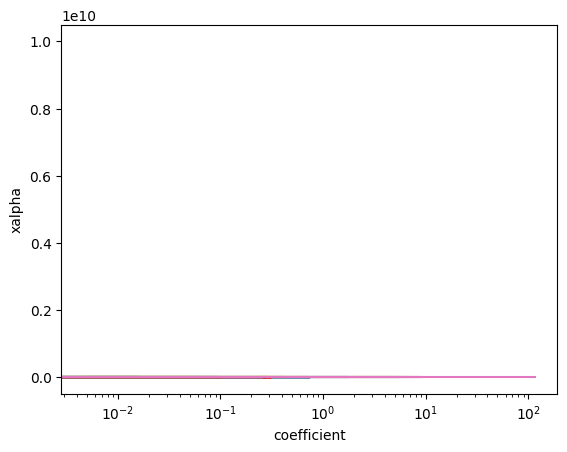

In [18]:
lasso = Lasso()
xalpha = 10**np.linspace(10,-2,100)*0.5
coeffs = []
for x in xalpha:
    lasso.set_params(alpha = x)
    lasso.fit(x_train,y_train)
    coeffs.append(lasso.coef_)
fig = plt.gca()
fig.plot(coeffs,xalpha*2)
fig.set_xscale("log")
plt.xlabel("coefficient")
plt.ylabel("xalpha")




Predict


In [20]:
y_predict = lasso_model.predict(x_test)

Test error

In [21]:
np.sqrt(mean_squared_error(y_test,y_predict))

356.09758845540347

In [33]:
lasso_cv_model = LassoCV(max_iter= 10000,cv = 10,alphas= None)

In [34]:
lasso_cv_model.fit(x_train,y_train)

LassoCV(cv=10, max_iter=10000)

In [35]:
lasso_cv_model.alpha_

563.4670501833853

In [37]:
lasso_tuned =Lasso(alpha=lasso_cv_model.alpha_)

In [38]:
lasso_tuned.fit(x_train,y_train)

Lasso(alpha=563.4670501833853)

Final model test error

In [39]:
y_predict2 =lasso_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_predict2))

373.5957225069795